# How much should we prepare for the event sponsorship budget in 2018?

* [Exploring the Data](#Exploring-the-Data)
* [Creating a Visualization](#Creating-a-Visualization)
* [Modeling the Data](#Modeling-the-Data)

## Exploring the Data

In [153]:
import pandas as pd

In [154]:
df = pd.read_csv('data/sponsorship-budget.csv')
df.head()

,year,revenue,number of employees,sponsor budget
0,2014,7500000.50,75.0,69000.14
1,2015,8500000.75,NaN,48500.50
2,2016,10500000.78,109.0,78500.30
3,2017,11800000.19,113.0,89000.84


In [155]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,year,revenue,number_of_employees,sponsor_budget
0,2014,7500000.50,75.0,69000.14
1,2015,8500000.75,NaN,48500.50
2,2016,10500000.78,109.0,78500.30
3,2017,11800000.19,113.0,89000.84


### Handling Missing Data 

missingno: https://github.com/ResidentMario/missingno

In [156]:
!pip install missingno

In [157]:
import missingno as msno

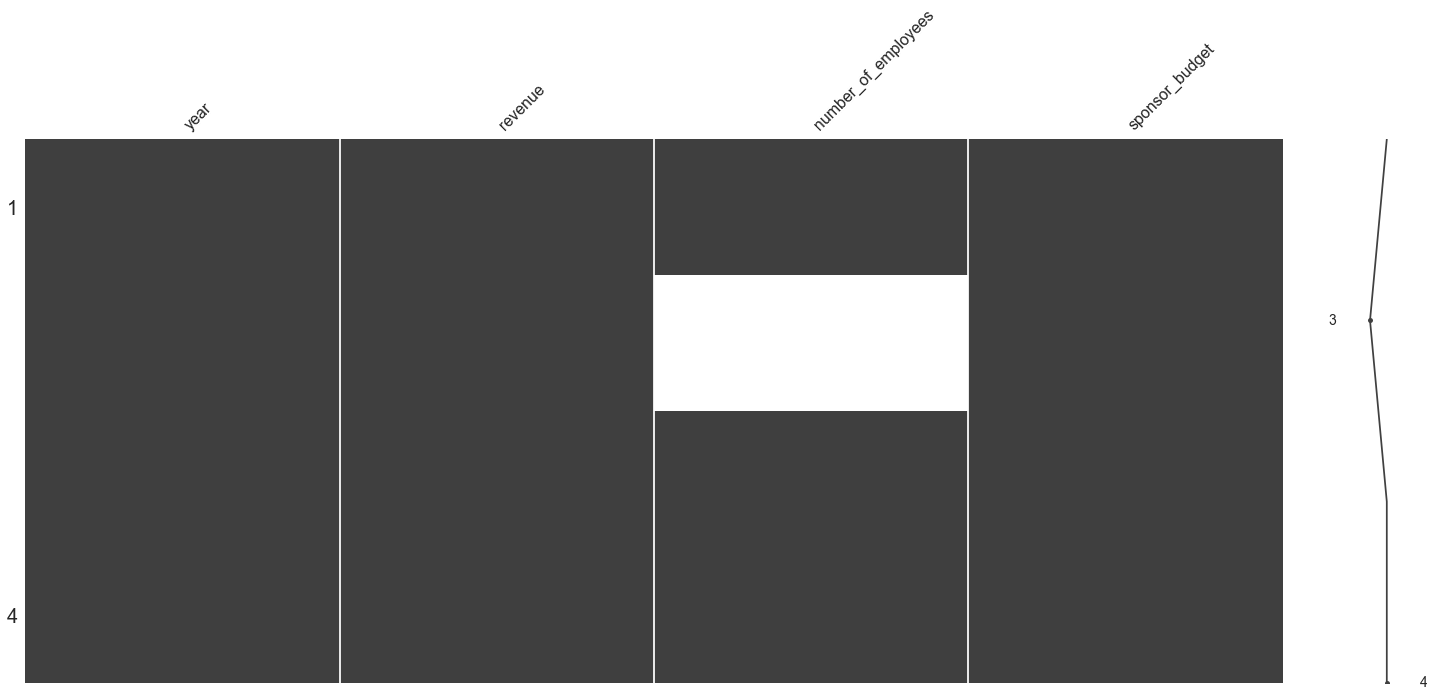

In [158]:
msno.matrix(df)

Fill in the missing data with some random value.

In [174]:
df.number_of_employees = df.number_of_employees.fillna(85)

In [175]:
df.head()

,year,revenue,number_of_employees,sponsor_budget
0,2014,7500000.50,75.0,69000.14
1,2015,8500000.75,85.0,48500.50
2,2016,10500000.78,109.0,78500.30
3,2017,11800000.19,113.0,89000.84


## Creating a Visualization

In [176]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

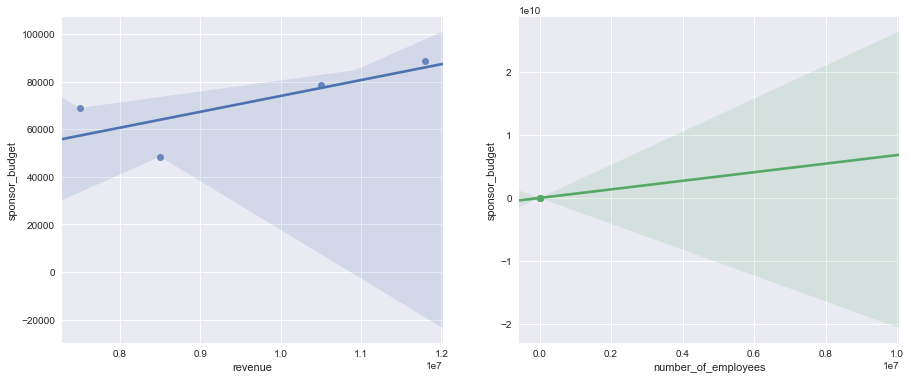

In [177]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.regplot('revenue', 'sponsor_budget', data=df, ax=ax[0])
sns.regplot('number_of_employees', 'sponsor_budget', data=df, ax=ax[1]);

## Modeling the Data

Let's use a very simple model namely Linear Regression.

In [178]:
from sklearn.linear_model import LinearRegression

### Selecting a Set of Features

In [179]:
import numpy as np
from sklearn.cross_validation import cross_val_score

In [180]:
y = df[df.year >= 2015]['sponsor_budget']

In [181]:
X = df[df.year <= 2016][['revenue', 'number_of_employees']]
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=2, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

39541.999418465071

In [182]:
X = df[df.year <= 2016][['revenue']]
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=2, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

39541.999417865081

In [183]:
X = df[df.year <= 2016][['number_of_employees']]
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=2, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

45541.966467816324

### Normalizing Data

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [186]:
X = df[df.year <= 2016][['revenue', 'number_of_employees']]
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

lr = LinearRegression()
scores = cross_val_score(lr, X_scaled, y_scaled, cv=2, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

2.4556130301959431

In [187]:
X = df[df.year <= 2016][['revenue']]
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

lr = LinearRegression()
scores = cross_val_score(lr, X_scaled, y_scaled, cv=2, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

2.3041660512343558

In [188]:
X = df[df.year <= 2016][['number_of_employees']]
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

lr = LinearRegression()
scores = cross_val_score(lr, X_scaled, y_scaled, cv=2, scoring='neg_mean_squared_error')

mse_scores = -scores
rmse_scores = np.sqrt(mse_scores)
rmse_scores.mean()

2.6537922863401189

### Creating a Final Model

In [204]:
selected_features = ['revenue']
label = 'sponsor_budget'

In [205]:
X = df[df.year <= 2016][selected_features]
y = df[df.year >= 2015][label]

scaler_x = StandardScaler()
scaler_x.fit(X)
X_scaled = scaler_x.transform(X)
scaler_y = StandardScaler()
scaler_y.fit(y.values.reshape(-1, 1))
y_scaled = scaler_y.transform(y.values.reshape(-1, 1))

In [206]:
lr = LinearRegression()
lr.fit(X_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
print(f'Coefficients: {lr.coef_}')
print(f'Independent Term: {lr.intercept_}')

Coefficients: [[ 0.89549625]]
Independent Term: [ -5.18104078e-16]


### Making a Prediction

In [208]:
X_test = df[df.year == 2017][selected_features]
X_test.head()

,revenue
3,11800000.19


In [209]:
X_test_scaled = scaler_x.transform(X_test)
X_test_scaled

array([[ 2.37862447]])

In [210]:
results = lr.predict(X_test_scaled)

In [211]:
print(f"Let's prepare the event sponsorship budget (in 2018) around {scaler_y.inverse_transform(results)} baht!")

Let's prepare the event sponsorship budget (in 2018) around [[ 108554.51277154]] baht!
